<a href="https://colab.research.google.com/github/yuri-kasahara/Workshop-Tekst-som-data/blob/main/Processing_and_analyzing_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now let's process our text and try to get some meaning out of it.

In [1]:
!pip install spacy
!python -m spacy download nb_core_news_sm
!pip install wordcloud

import pandas as pd

2023-12-06 21:40:05.489608: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-06 21:40:05.489678: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-06 21:40:05.489727: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-06 21:40:05.506400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-06 21:40:08.807380: W tensorflow/compiler/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("drive/MyDrive/WorkshopTSD/Comment_links.csv", sep=',', dtype='string')
print(df)

             ID                                       Text_comment  \
0   ['2819979']                                               <NA>   
1   ['2819979']  Høring tverrfaglig helsekartlegging av barn i ...   
2   ['2819979']      Vedalgt følger Advokatforeningens uttalelse.    
3   ['2819979']  Høringssvar til høring om tverrfaglig helsekar...   
4   ['2819979']  Høringssvar «Tverrfaglig helsekartlegging av b...   
..          ...                                                ...   
95  ['2819979']  Statsforvalteren i Troms og Finnmark viser til...   
96  ['2819979']  Statsforvalteren i Trøndelag vil innledningsvi...   
97  ['2819979']  Vi fant dessverre ikke siden du lette etter (4...   
98  ['2819979']  Vedlagt følger høringssvar fra Stiftelsen Kirk...   
99  ['2819979']  Vi fant dessverre ikke siden du lette etter (4...   

                                         Organisation  
0                  Actis - Rusfeltets samarbeidsorgan  
1                                          ADHD

In [4]:
#We want to remove the rows where "Text_comment" is empty
df.dropna(inplace=True)

#Then we want to remove the rows were the comments was not found or was a pdf.
df_filtered = df[~df['Text_comment'].str.contains('Vi fant dessverre ikke siden', regex=True)]

df_filtered = df_filtered[~df_filtered['Text_comment'].str.contains('Vedlagt', regex=True)]

df_filtered = df_filtered[~df_filtered['Text_comment'].str.contains('Vedalgt', regex=True)]

print(df_filtered)

df_filtered.to_csv('drive/MyDrive/WorkshopTSD/Comments_clean.csv', index=False)

             ID                                       Text_comment  \
1   ['2819979']  Høring tverrfaglig helsekartlegging av barn i ...   
3   ['2819979']  Høringssvar til høring om tverrfaglig helsekar...   
4   ['2819979']  Høringssvar «Tverrfaglig helsekartlegging av b...   
7   ['2819979']  Høringssvar - tverrfaglig helsekartlegging av ...   
8   ['2819979']  Autismeforeningen i Norge ble stiftet i 1965 o...   
9   ['2819979']  Avdeling BUP (ABUP), Akershus Universitetssyke...   
11  ['2819979']  Bufetat region nord, datert 21.03.21   Bufetat...   
15  ['2819979']                                                      
17  ['2819979']  Høringssvar fra Bufetat region vest - tverrfag...   
18  ['2819979']  Høringssvar fra Bufetat, region Midt-Norge til...   
20  ['2819979']  Høringssvar tverrfaglig helsekartlegging av ba...   
25  ['2819979']  Diakonhjemmet Omsorg er en ideell aktør i ster...   
27  ['2819979']  Høringsuttalelse fra Drammen kommune om tverrf...   
30  ['2819979']  FO 

Now let's make our "bag of words" and tokenize the comments!

In [5]:

# Let's load our tokenizer from spacy. Remember to load one appropriate to the working language.

import spacy

nlp = spacy.load('nb_core_news_sm')

token_list = []

for _, row in df_filtered.iterrows():
  doc = nlp(row['Text_comment'])
  for token in doc:
     if not token.is_punct and not token.is_space:
        token_list.append({'Organisation': row['Organisation'], 'Token':token.text.lower(), 'POS': token.pos_, 'Lemma': token.lemma_.lower()})

token_df = pd.DataFrame(token_list)

print(token_df)

                       Organisation              Token    POS  \
0                        ADHD Norge             høring  PROPN   
1                        ADHD Norge        tverrfaglig    ADJ   
2                        ADHD Norge   helsekartlegging   NOUN   
3                        ADHD Norge                 av    ADP   
4                        ADHD Norge               barn   NOUN   
...                             ...                ...    ...   
47170  Statsforvalteren i Trøndelag  omsorgsavdelingen   NOUN   
47171  Statsforvalteren i Trøndelag         dokumentet  PROPN   
47172  Statsforvalteren i Trøndelag                 er    AUX   
47173  Statsforvalteren i Trøndelag        elektronisk    ADJ   
47174  Statsforvalteren i Trøndelag           godkjent    ADJ   

                  Lemma  
0                høring  
1           tverrfaglig  
2      helsekartlegging  
3                    av  
4                  barn  
...                 ...  
47170   omsorgsavdeling  
47171      

Let's now calculate some frequencies!

In [6]:
frequency_df = token_df.groupby(['Token']).size().reset_index(name='Frequency')

# Sort in descending order
sorted_df = frequency_df.sort_values(by=['Frequency'], ascending=[False])


#
print(sorted_df)

                     Token  Frequency
3127                    og       1818
2104                     i       1443
391                     at       1206
957                    det       1097
1351                   for       1087
...                    ...        ...
2341              kaasbøll          1
2342                kaller          1
2343                kalles          1
2347          kan-tjeneste          1
5253  øyenvitneskildringer          1

[5254 rows x 2 columns]


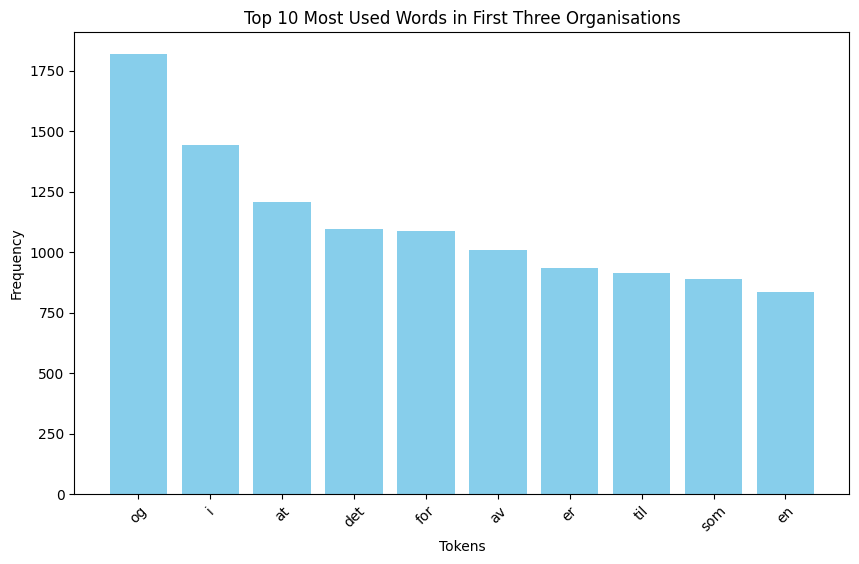

In [7]:
# Let's plot a histogram of the top 10 words.

import matplotlib.pyplot as plt

top_10_words = frequency_df.nlargest(10, 'Frequency')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Token'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in First Three Organisations')
plt.xticks(rotation=45)
plt.show()


A lot of not very meaningful words... Let's remove them!

                 Token  Frequency
499               barn        508
1859  helsekartlegging        398
527             barnet        296
865                bør        273
531        barnevernet        191
4740       tverrfaglig        188
648              behov        181
2368       kartlegging        177
528            barnets        172
2370     kartleggingen        163


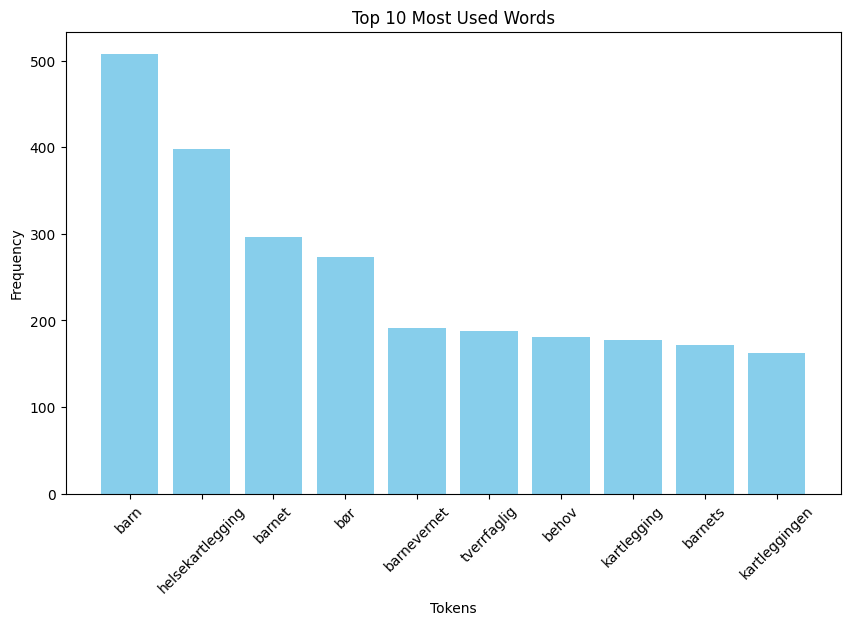

In [8]:
# Let's filter the stop words!

stop_words = nlp.Defaults.stop_words
frequency_df = frequency_df[~frequency_df['Token'].isin(stop_words)]

# And let's plot the figure again

top_10_words = frequency_df.nlargest(10, 'Frequency')

print(top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Token'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()




Let's use the lemma of each word!

                  Lemma  Frequency
432                barn       1103
1453   helsekartlegging        514
1849        kartlegging        348
695               burde        278
460           barnevern        245
3620        tverrfaglig        227
563               behov        219
1927            kommune        183
3946            vurdere        151
516   barneverntjeneste        148


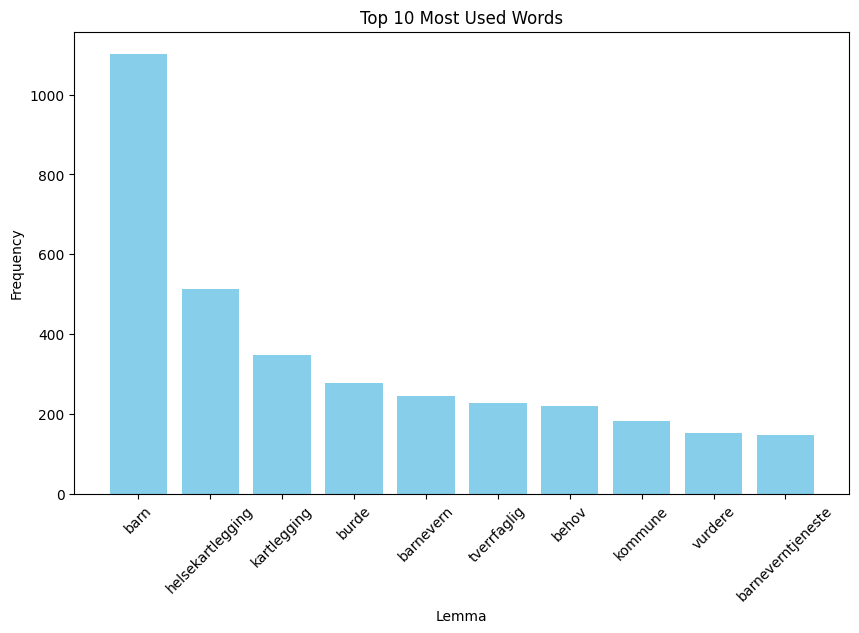

In [9]:
frequency_df = token_df.groupby(['Lemma']).size().reset_index(name='Frequency')

frequency_df = frequency_df[~frequency_df['Lemma'].isin(stop_words)]

# And let's plot the figure again

top_10_words = frequency_df.nlargest(10, 'Frequency')

print(top_10_words)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_words['Lemma'], top_10_words['Frequency'], color='skyblue')
plt.xlabel('Lemma')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.show()


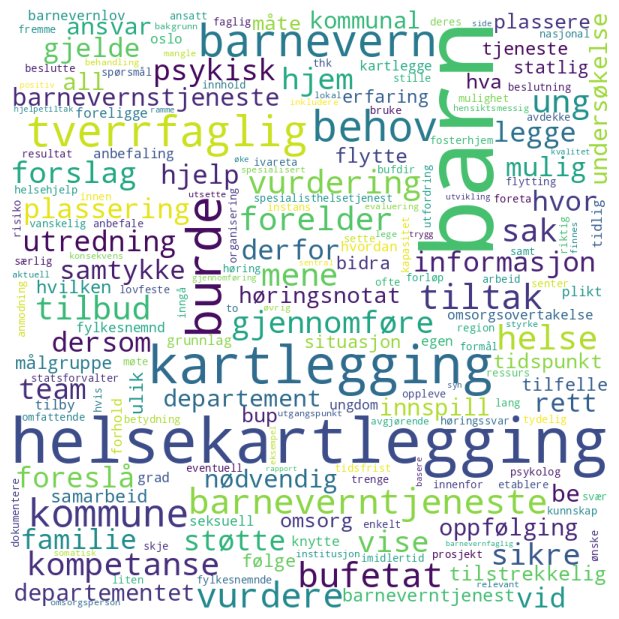

In [10]:
from wordcloud import WordCloud

frequency_df = token_df[~token_df['Lemma'].isin(stop_words)]

word_freq = frequency_df['Lemma'].value_counts().to_dict()

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10)

wordcloud.generate_from_frequencies(word_freq)

# Plotting the WordCloud
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Let's try a simple sentiment analysis of the commentaries!

In [11]:
# Load lexicon files obtained from https://github.com/ltgoslo/norsentlex/tree/master/Fullform
# Assuming each word in the lexicon files is on a new line
with open('/content/drive/MyDrive/WorkshopTSD/Fullform_Positive_lexicon.txt', 'r') as file:
    positive_words = set(file.read().splitlines())

with open('/content/drive/MyDrive/WorkshopTSD/Fullform_Negative_lexicon.txt', 'r') as file:
    negative_words = set(file.read().splitlines())

# Function to assign sentiment score
def assign_sentiment(token):
    if token in positive_words:
        return 1
    elif token in negative_words:
        return -1
    else:
        return 0

# Assign sentiment score to each token
token_df['SentimentScore'] = token_df['Token'].apply(assign_sentiment)

# Aggregate sentiment scores by document
document_sentiment = token_df.groupby('Organisation')['SentimentScore'].sum()
sorted_df = document_sentiment.sort_values(ascending=False)
print(sorted_df)


Organisation
Bufetat, region Midt-Norge                                                                    295
Fokus på Barnevernet                                                                          160
Drammen kommune                                                                               103
Barne-, ungdoms og familieetaten (Bufetat), region nord                                       101
Fylkesnemndene for barnevern og sosiale saker                                                  87
Norsk Fosterhjemsforening                                                                      84
Oslo Kommune                                                                                   73
KS                                                                                             62
Akademikerforbundet                                                                            61
Diakonhjemmet Omsorg                                                                           54
Ideelt 

Now, let's try some Topic Modelling using LDA (Latent Dirichlet Allocation).

In [12]:
# We will need some new libraries
!pip install gensim

!pip install pyldavis

!pip install pandas==1.5.3

from gensim import corpora, models

import pandas as pd

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

  Using cached pandas-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.3 which is incompatible.
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3
ERROR: pip

In [13]:
#Let's clean the corpus again and also remove some tokens based on their POS classifications.
token_df_clean = token_df[~token_df['Lemma'].isin(stop_words)]

# POS types to exclude
excluded_pos = {'ADV', 'AUX', 'ADP'}

# Filter out rows where 'POS' is in the excluded POS types
token_df_clean = token_df_clean[~token_df_clean['POS'].isin(excluded_pos)]


# Prepare the data (list of lists)

docs = token_df_clean.groupby('Organisation')['Lemma'].apply(list).tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(docs)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=100000)

# Create a corpus: list of bag of words (bow) for each document
corpus = [dictionary.doc2bow(doc) for doc in docs]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

Topic: 0 
Words: 0.005*"ungdom" + 0.005*"team" + 0.005*"tjeneste" + 0.004*"ulik" + 0.003*"ain" + 0.003*"stillasbyggerne" + 0.003*"undersøkelse" + 0.003*"arbeid" + 0.003*"høringssvar" + 0.003*"evaluering"
Topic: 1 
Words: 0.011*"seksuell" + 0.006*"familie" + 0.005*"ungdom" + 0.005*"seksualitet" + 0.005*"møte" + 0.005*"høring" + 0.004*"seksualitetsmangfold" + 0.004*"kjønns-" + 0.004*"orientering" + 0.004*"ib"
Topic: 2 
Words: 0.005*"dersom" + 0.005*"samtykke" + 0.005*"team" + 0.005*"plassering" + 0.005*"nødvendig" + 0.004*"gjelde" + 0.004*"rett" + 0.004*"departementet" + 0.004*"barnevernstjeneste" + 0.004*"bup"


In [14]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, mds="mmds", R=30)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [15]:
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.029116  0.077375       1        1  76.512476
1      0.049410 -0.071016       2        1  14.837980
0     -0.078525 -0.006359       3        1   8.649544, topic_info=                    Term       Freq      Total Category  logprob  loglift
2217            seksuell  29.000000  29.000000  Default  30.0000  30.0000
162               ungdom  34.000000  34.000000  Default  29.0000  29.0000
33               familie  61.000000  61.000000  Default  28.0000  28.0000
400             tjeneste  45.000000  45.000000  Default  27.0000  27.0000
391                 team  72.000000  72.000000  Default  26.0000  26.0000
...                  ...        ...        ...      ...      ...      ...
22                 deres   3.313627  32.076171   Topic3  -6.0575   0.1776
267                  hva   3.329113  49.104705   Topic3  -6.0528  -0.2436
33               familie   3.192655  61.837395   Topic3  -6.0947  -0.5160
14    barnevernstjeneste   3.154493  58.157142   Topic3  -6.1067  -0.4667
351             resultat   2.815218  31.343898   Topic3  -6.2205   0.0377

[216 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
2022      1  0.988406                 15
2912      3  0.569950               2018
747       3  0.916596                ain
178       3  0.569888  akademikerforbund
2154      2  0.910746          akseptere
...     ...       ...                ...
1808      1  0.940348             utføre
2983      2  0.756148            utsendt
166       1  0.654169          utvikling
166       2  0.301924          utvikling
166       3  0.050321          utvikling

[332 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])